<a href="https://colab.research.google.com/github/balas05/ML-minor-projects/blob/main/DAI_LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

In [4]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['target'])


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train.values.ravel())
y_pred = log_reg.predict(X_test_scaled)


In [7]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [8]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
F1 Score: 0.979020979020979


In [9]:
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)


Confusion Matrix:
[[41  2]
 [ 1 70]]


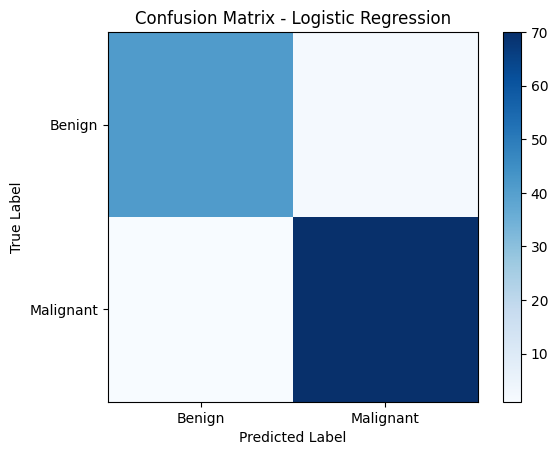

In [10]:
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.yticks([0, 1], ['Benign', 'Malignant'])
plt.show()


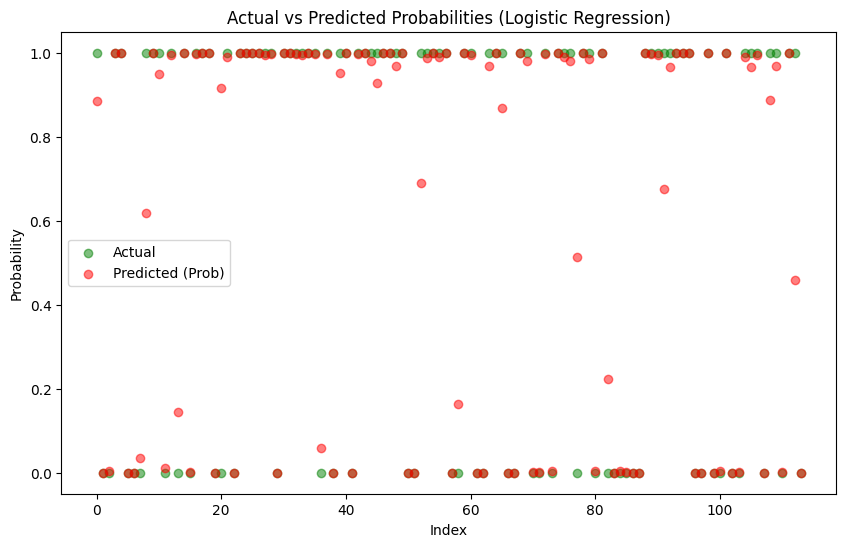

In [12]:
plt.figure(figsize=(10, 6))

plt.scatter(range(len(X_test)), y_test, color='green', label='Actual', alpha=0.5)


plt.scatter(range(len(X_test)), log_reg.predict_proba(X_test_scaled)[:, 1], color='red', label='Predicted (Prob)', alpha=0.5)

plt.xlabel('Index')
plt.ylabel('Probability')
plt.title('Actual vs Predicted Probabilities (Logistic Regression)')
plt.legend()
plt.show()